<a href="https://colab.research.google.com/github/Migrice/Master2-Projects/blob/main/SA_on_playstore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 6.8 MB/s 
     |████████████████████████████████| 5.6 MB 49.6 MB/s 
     |████████████████████████████████| 880 kB 41.9 MB/s 
     |████████████████████████████████| 132 kB 51.6 MB/s 
     |████████████████████████████████| 1.3 MB 42.8 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 10.0 MB 48.1 MB/s 
     |████████████████████████████████| 140 kB 71.4 MB/s 
     |████████████████████████████████| 127 kB 54.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=2027e0dfb3f47ee1e4cb068b735272e16e7124b4cdc45bdffc4d89cf081c5f32
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    

In [2]:
import torch
print(torch.cuda.is_available())

True


In [4]:
from zipfile import ZipFile 
  
# spécifiant le nom du fichier zip
file = "play_store_reviews.zip"
  
# ouvrir le fichier zip en mode lecture
with ZipFile(file, 'r') as zip: 
    # afficher tout le contenu du fichier zip
    zip.printdir() 
  
    # extraire tous les fichiers
    print('extraction...') 
    zip.extractall() 
    print('Terminé!')

File Name                                             Modified             Size
reviews.csv                                    2020-12-24 08:17:04      6451055
extraction...
Terminé!


In [5]:
#load librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [7]:
df.shape

(12495, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score')

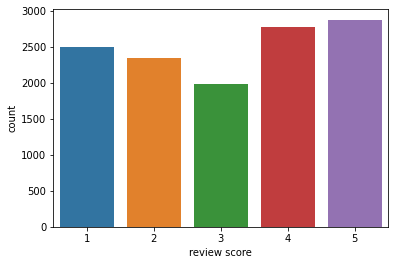

In [9]:
sns.countplot(df.score)
plt.xlabel("review score")

In [10]:
#separate scores into 3 classes
def to_sentiment(score):
  score = int(score)
  if score <=2 :
    return 0
  elif score ==3:
    return 1
  else :
    return 2

df["sentiment"] = df.score.apply(to_sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')]

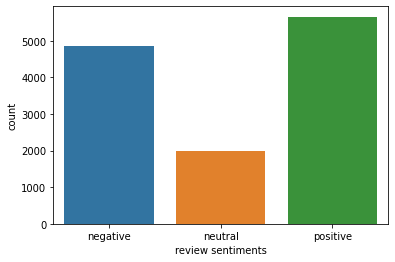

In [11]:
classnames = ["negative", "neutral", "positive"]
ax = sns.countplot(df["sentiment"])
plt.xlabel("review sentiments")

ax.set_xticklabels(classnames)

In [12]:
#Data preprocessing

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [13]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [14]:
print(len(encoding["input_ids"][0]))
print(encoding["input_ids"]) #tokens
print(encoding["attention_mask"]) #1 represent real words and 0 represent paddings
tokenizer.convert_ids_to_tokens(encoding["input_ids"][0])

32
tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
         1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


['[CLS]',
 'When',
 'was',
 'I',
 'last',
 'outside',
 '?',
 'I',
 'am',
 'stuck',
 'at',
 'home',
 'for',
 '2',
 'weeks',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [15]:
#check the maximum sequence length
token_lens = []
for txt in df.content:
  token = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(token))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

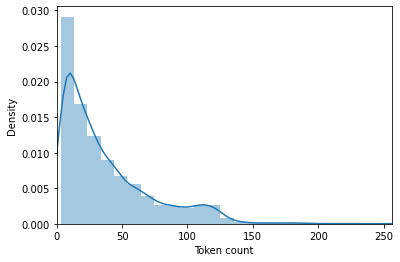

In [16]:
#plot to see the distribution
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [17]:
max_length = 160
class GPReviewDataset(torch.utils.data.Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [18]:
#separate dataset into train, test, val
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((9996, 13), (1249, 13), (1250, 13))

In [19]:
#create data loader
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return torch.utils.data.DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [20]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, max_length, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, max_length, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, max_length, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [21]:
#look of datas
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [22]:
print(data['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(data["input_ids"][0]))
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
['[CLS]', 'I', 'kinda', 'love', 'this', 'app', 'but', 'the', 'only', 'problem', 'that', 'I', "'", 've', 'face', 'now', 'is', 'that', 'i', 'want', 'to', 'have', 'my', 'task', 'on', 'my', 'p', '##c', 'and', 'i', 'think', 'it', 'would', 'be', 'great', 'if', 'you', 'could', 'put', 'some', 'accounts', 'so', 'that', 'we', 'can', 'easily', 'sort', 'our', 'task', 'in', 'any', 'devices', 'that', 'we', 'are', 'into', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 

In [23]:
#load bert model
bert_model = BertModel.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [24]:
#use the bert model to encode the text

last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask'],
)

In [25]:
print(last_hidden_state.shape) #sortie des autres couches cachées
print(pooled_output.shape) #sortie de la premiere couche , celle de classification

torch.Size([1, 32, 768])
torch.Size([1, 768])


In [26]:
from torch import nn
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("bert-base-cased")
    self.dropout = nn.Dropout(p=0.3)
    self.linear = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
    output = self.dropout(pooled_output)
    return self.linear(output)

In [27]:
#create an instance of a model and move it to the GPU
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = SentimentClassifier(len(classnames))
model = model.to(device)

In [28]:
#put the input ids and attention_mask to the GPU
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [30]:
#to get the predicted probabilities, we will apply the softmax function to the output
from torch.nn import functional as F
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3014, 0.2497, 0.4489],
        [0.2735, 0.3292, 0.3973],
        [0.3892, 0.2167, 0.3941],
        [0.3261, 0.2660, 0.4079],
        [0.2979, 0.3801, 0.3220],
        [0.2495, 0.2878, 0.4627],
        [0.1887, 0.5096, 0.3016],
        [0.2817, 0.3024, 0.4158],
        [0.2250, 0.4414, 0.3336],
        [0.3111, 0.3658, 0.3231],
        [0.4671, 0.3103, 0.2225],
        [0.4132, 0.2300, 0.3568],
        [0.2522, 0.4162, 0.3316],
        [0.4506, 0.2708, 0.2785],
        [0.2703, 0.4150, 0.3147],
        [0.2668, 0.4453, 0.2879]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [31]:
#train the model
import transformers
EPOCHS = 10


optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * EPOCHS

scheduler = transformers.get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [32]:
from tqdm import tqdm
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [33]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [34]:
%%time
  
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


100%|██████████| 625/625 [04:30<00:00,  2.31it/s]


Train loss 0.6906320470094681 accuracy 0.7197879151660664


100%|██████████| 79/79 [00:11<00:00,  6.64it/s]


Val   loss 0.6022386418867715 accuracy 0.7654123298638911

Epoch 2/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.5112989574968815 accuracy 0.8000200080032014


100%|██████████| 79/79 [00:12<00:00,  6.58it/s]


Val   loss 0.6391898450217669 accuracy 0.7646116893514812

Epoch 3/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.3788855797767639 accuracy 0.8585434173669468


100%|██████████| 79/79 [00:11<00:00,  6.64it/s]


Val   loss 0.7687890059963057 accuracy 0.7381905524419535

Epoch 4/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.2758550548899919 accuracy 0.9076630652260905


100%|██████████| 79/79 [00:11<00:00,  6.61it/s]


Val   loss 0.9133273944070067 accuracy 0.7357886309047237

Epoch 5/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.21494513396136464 accuracy 0.9335734293717488


100%|██████████| 79/79 [00:11<00:00,  6.60it/s]


Val   loss 1.0990486552443686 accuracy 0.7421937550040032

Epoch 6/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.15534946934431793 accuracy 0.955482192877151


100%|██████████| 79/79 [00:11<00:00,  6.61it/s]


Val   loss 1.3252304920667335 accuracy 0.7421937550040032

Epoch 7/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.12504482618039475 accuracy 0.9638855542216888


100%|██████████| 79/79 [00:11<00:00,  6.63it/s]


Val   loss 1.5703162807452529 accuracy 0.7245796637309847

Epoch 8/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.09224454503525048 accuracy 0.9740896358543418


100%|██████████| 79/79 [00:11<00:00,  6.60it/s]


Val   loss 1.6370835030757929 accuracy 0.732586068855084

Epoch 9/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.07542608087086118 accuracy 0.9799919967987195


100%|██████████| 79/79 [00:12<00:00,  6.57it/s]


Val   loss 1.6798594069631794 accuracy 0.7365892714171337

Epoch 10/10
----------


100%|██████████| 625/625 [04:34<00:00,  2.28it/s]


Train loss 0.0657712222176604 accuracy 0.982092837134854


100%|██████████| 79/79 [00:12<00:00,  6.56it/s]

Val   loss 1.7492148630981204 accuracy 0.7397918334667734

CPU times: user 32min 13s, sys: 15min 5s, total: 47min 19s
Wall time: 47min 41s


In [35]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

100%|██████████| 79/79 [00:11<00:00,  7.07it/s]


0.7384000000000001

In [36]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [37]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred, target_names=classnames))

              precision    recall  f1-score   support

    negative       0.78      0.79      0.79       480
     neutral       0.38      0.38      0.38       216
    positive       0.84      0.83      0.84       554

    accuracy                           0.74      1250
   macro avg       0.67      0.67      0.67      1250
weighted avg       0.74      0.74      0.74      1250



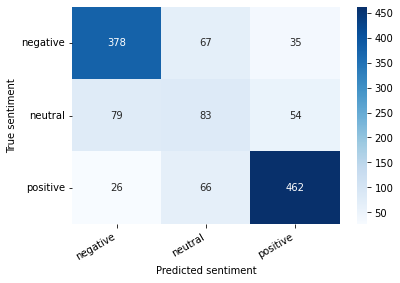

In [39]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classnames, columns=classnames)
show_confusion_matrix(df_cm)

In [40]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': classnames,
  'values': y_pred_probs[idx]
})

In [41]:
from textwrap import wrap
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {classnames[true_sentiment]}')

Easy to use. No dramas. Very streamline for basic list use.

True sentiment: positive


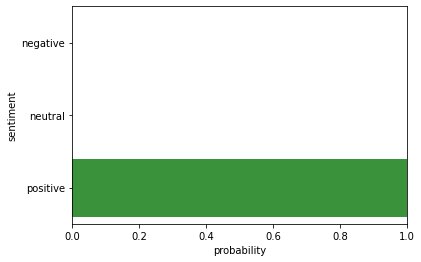

In [42]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [43]:
#predict one text
review_text = "I love completing my todos! Best app ever!!!"

In [44]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=max_length,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [45]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {classnames[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive
